<a href="https://colab.research.google.com/github/fuserkuba/HackerRank/blob/master/TheBestAptitudeTest/HR_The_Best_Aptitude_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import requests

path='https://raw.githubusercontent.com/fuserkuba/HackerRank/master/TheBestAptitudeTest/the-best-aptitude-test-testcases/input/'

input_file=path+'input01.txt'

input=requests.get(input_file).text.split("\n")
print(input)

['1', '5', '7.5 7.7 7.9 8.1 8.3', '10 30 20 40 50', '11 9 5 19 29', '21 9 15 19 39', '91 9 75 19 89', '81 99 55 59 89']


# **READING INPUT**

In [79]:
input_iter=iter(input)

#T testcases follow. 
T=int(next(input_iter))
# Number of admitted students
N=int(next(input_iter))

first_year=np.array(list(map(float,next(input_iter).split(' '))))
ap_tests=np.array([list(map(float,next(input_iter).split(' '))) for _ in range(5)])

print(first_year)
print(ap_tests)

y_column='GPA'
df=pd.DataFrame(first_year.reshape(-1,1),columns=[y_column])
df=pd.concat([pd.DataFrame(ap_tests.T),df],axis=1)


[7.5 7.7 7.9 8.1 8.3]
[[10. 30. 20. 40. 50.]
 [11.  9.  5. 19. 29.]
 [21.  9. 15. 19. 39.]
 [91.  9. 75. 19. 89.]
 [81. 99. 55. 59. 89.]]


# **EXPLORATORY DATA ANALYSIS**

0      float64
1      float64
2      float64
3      float64
4      float64
GPA    float64
dtype: object
<bound method DataFrame.info of       0     1     2     3     4  GPA
0  10.0  11.0  21.0  91.0  81.0  7.5
1  30.0   9.0   9.0   9.0  99.0  7.7
2  20.0   5.0  15.0  75.0  55.0  7.9
3  40.0  19.0  19.0  19.0  59.0  8.1
4  50.0  29.0  39.0  89.0  89.0  8.3>
               0          1          2          3         4       GPA
count   5.000000   5.000000   5.000000   5.000000   5.00000  5.000000
mean   30.000000  14.600000  20.600000  56.600000  76.60000  7.900000
std    15.811388   9.528903  11.260551  39.532265  19.04731  0.316228
min    10.000000   5.000000   9.000000   9.000000  55.00000  7.500000
25%    20.000000   9.000000  15.000000  19.000000  59.00000  7.700000
50%    30.000000  11.000000  19.000000  75.000000  81.00000  7.900000
75%    40.000000  19.000000  21.000000  89.000000  89.00000  8.100000
max    50.000000  29.000000  39.000000  91.000000  99.00000  8.300000
       0   

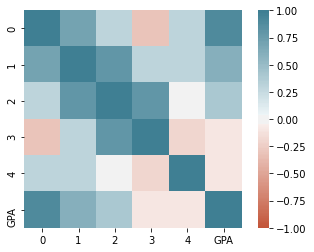

In [113]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn.preprocessing import StandardScaler

print(df.dtypes)
print(df.info)
print(df.describe())

#Displays correlation matrix
corr=df.corr('spearman')
print(corr)
heat_map=sns.heatmap(corr,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
plt.show(heat_map)

#Plot pairwise bivariate distributions
#plt.show(sns.pairplot(df))


# **PREPARE TRAIN AND TEST DATA**

In [86]:
df_train=df

X_train=df_train.values[:,:-1]
y_train=df_train.values[:,-1].reshape(-1,1)

print(df_train.info())
print(X_train[:10],X_train.shape)
print(y_train[:10],y_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5 non-null      float64
 1   1       5 non-null      float64
 2   2       5 non-null      float64
 3   3       5 non-null      float64
 4   4       5 non-null      float64
 5   GPA     5 non-null      float64
dtypes: float64(6)
memory usage: 368.0 bytes
None
[[10. 11. 21. 91. 81.]
 [30.  9.  9.  9. 99.]
 [20.  5. 15. 75. 55.]
 [40. 19. 19. 19. 59.]
 [50. 29. 39. 89. 89.]] (5, 5)
[7.5 7.7 7.9 8.1 8.3] (5,)


# **TRAIN MODEL**

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
#Feature ranking with recursive feature elimination.
from sklearn.feature_selection import RFE

estimator=SVR(kernel="linear")

model = RFE(estimator, n_features_to_select=1, step=1)

print(X_train)
print(y_train)
model.fit(X_train,y_train.T)

#The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature
model.ranking_


[[10. 11. 21. 91. 81.]
 [30.  9.  9.  9. 99.]
 [20.  5. 15. 75. 55.]
 [40. 19. 19. 19. 59.]
 [50. 29. 39. 89. 89.]]
[7.5 7.7 7.9 8.1 8.3]


array([1, 4, 2, 5, 3])

# **TEST MODEL**

In [109]:
# By recursive feature elimination
y_predict=model.ranking_.argmin()+1
print(y_predict)

#By correlation
y_predict_corr=abs(df_train.corr()['GPA'].values[:-1]).argmax()+1
print(y_predict_corr)



1
1
